In [1]:
import os
import cv2
import numpy as np
import mediapipe as mp

In [1]:
import cv2
import os
import mediapipe as mp

def crop_center(image, target_size):
    """Crop the image to the specified target size while keeping the center."""
    height, width, _ = image.shape
    target_height, target_width = target_size
    start_y = max(0, (height - target_height) // 2)
    end_y = min(height, start_y + target_height)
    start_x = max(0, (width - target_width) // 2)
    end_x = min(width, start_x + target_width)
    cropped_image = image[start_y:end_y, start_x:end_x]
    return cropped_image

def extract_frames(video_file, output_folder, target_size=(224, 224), total_frames=30):
    # Open the video file
    cap = cv2.VideoCapture(video_file)

    # Get the frame count
    total_video_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate frame interval
    frame_interval = max(total_video_frames // total_frames, 1)

    # Create output subfolder based on video file name
    video_name = os.path.splitext(os.path.basename(video_file))[0]
    video_subfolder = os.path.join(output_folder, video_name)
    os.makedirs(video_subfolder, exist_ok=True)

    # Initialize MediaPipe Holistic model
    mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    # Loop through each frame
    frames_saved = 0
    frame_index = 0
    prev_frame = None
    while frames_saved < total_frames:
        # Set the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)

        # Read the frame
        ret, frame = cap.read()

        if ret:
            # Convert frame to RGB (MediaPipe requires RGB input)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Detect pose landmarks in the frame
            results = mp_holistic.process(frame_rgb)

            # Check if pose landmarks are detected
            if results.pose_landmarks:
                # Resize the frame to the target size
                resized_frame = cv2.resize(frame, target_size)

                # Generate frame file name with frame index
                frame_file = os.path.join(video_subfolder, f"{video_name}_frame_{frames_saved}.jpg")

                # Save the resized frame
                cv2.imwrite(frame_file, resized_frame)
                print(f"Saved frame {frames_saved} of video {video_name}")
                frames_saved += 1

            # Increment frame index by frame interval
            frame_index += frame_interval
        else:
            print(f"Error reading frame {frame_index} of video {video_name}")
            break

    # Release the video capture object
    cap.release()

    # Release MediaPipe Holistic model
    mp_holistic.close()


def extract_frames_from_folder(root_video_folder, output_folder, target_size=(224, 224), total_frames_per_video=30, max_videos_per_action=5):
    # Loop through each folder containing videos
    for action_folder in os.listdir(root_video_folder):
        action_path = os.path.join(root_video_folder, action_folder)
        # Ensure it's a directory
        if os.path.isdir(action_path):
            # Count the number of video files in the action folder
            num_videos = len([name for name in os.listdir(action_path) if name.endswith(".mp4")])
            # Check if the number of videos is less than 5
            if num_videos < max_videos_per_action:
                continue
            # Create subfolder for the action in the output folder
            action_output_folder = os.path.join(output_folder, action_folder)
            os.makedirs(action_output_folder, exist_ok=True)
            # Counter for number of videos processed
            videos_processed = 0
            # Loop through each video file in the action folder
            for video_file in os.listdir(action_path):
                if video_file.endswith(".mp4"):  # Check if it's an MP4 file
                    # Check if maximum number of videos per action reached
                    if videos_processed >= max_videos_per_action:
                        break
                    video_path = os.path.join(action_path, video_file)
                    # Process the video and extract frames
                    extract_frames(video_path, action_output_folder, target_size=target_size, total_frames=total_frames_per_video)
                    videos_processed += 1

# Example usage
root_video_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\SL"
output_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\newFrames"

extract_frames_from_folder(root_video_folder, output_folder, total_frames_per_video=30, max_videos_per_action=5)



Saved frame 0 of video 01610
Saved frame 1 of video 01610
Saved frame 2 of video 01610
Saved frame 3 of video 01610
Saved frame 4 of video 01610
Saved frame 5 of video 01610
Saved frame 6 of video 01610
Saved frame 7 of video 01610
Saved frame 8 of video 01610
Saved frame 9 of video 01610
Saved frame 10 of video 01610
Saved frame 11 of video 01610
Saved frame 12 of video 01610
Saved frame 13 of video 01610
Saved frame 14 of video 01610
Saved frame 15 of video 01610
Saved frame 16 of video 01610
Saved frame 17 of video 01610
Saved frame 18 of video 01610
Saved frame 19 of video 01610
Saved frame 20 of video 01610
Saved frame 21 of video 01610
Saved frame 22 of video 01610
Saved frame 23 of video 01610
Saved frame 24 of video 01610
Saved frame 25 of video 01610
Saved frame 26 of video 01610
Saved frame 27 of video 01610
Saved frame 28 of video 01610
Saved frame 29 of video 01610
Saved frame 0 of video 01611
Saved frame 1 of video 01611
Saved frame 2 of video 01611
Saved frame 3 of video

Saved frame 0 of video 02129
Saved frame 1 of video 02129
Saved frame 2 of video 02129
Saved frame 3 of video 02129
Saved frame 4 of video 02129
Saved frame 5 of video 02129
Saved frame 6 of video 02129
Saved frame 7 of video 02129
Saved frame 8 of video 02129
Saved frame 9 of video 02129
Saved frame 10 of video 02129
Saved frame 11 of video 02129
Saved frame 12 of video 02129
Saved frame 13 of video 02129
Saved frame 14 of video 02129
Saved frame 15 of video 02129
Saved frame 16 of video 02129
Saved frame 17 of video 02129
Saved frame 18 of video 02129
Saved frame 19 of video 02129
Saved frame 20 of video 02129
Saved frame 21 of video 02129
Saved frame 22 of video 02129
Saved frame 23 of video 02129
Saved frame 24 of video 02129
Saved frame 25 of video 02129
Saved frame 26 of video 02129
Saved frame 27 of video 02129
Saved frame 28 of video 02129
Error reading frame 29 of video 02129
Saved frame 0 of video 00335
Saved frame 1 of video 00335
Saved frame 2 of video 00335
Saved frame 3 o

Saved frame 7 of video 00381
Saved frame 8 of video 00381
Saved frame 9 of video 00381
Saved frame 10 of video 00381
Saved frame 11 of video 00381
Saved frame 12 of video 00381
Saved frame 13 of video 00381
Saved frame 14 of video 00381
Saved frame 15 of video 00381
Saved frame 16 of video 00381
Saved frame 17 of video 00381
Saved frame 18 of video 00381
Saved frame 19 of video 00381
Saved frame 20 of video 00381
Saved frame 21 of video 00381
Saved frame 22 of video 00381
Saved frame 23 of video 00381
Saved frame 24 of video 00381
Saved frame 25 of video 00381
Saved frame 26 of video 00381
Saved frame 27 of video 00381
Saved frame 28 of video 00381
Saved frame 29 of video 00381
Saved frame 0 of video 00382
Saved frame 1 of video 00382
Saved frame 2 of video 00382
Saved frame 3 of video 00382
Saved frame 4 of video 00382
Saved frame 5 of video 00382
Saved frame 6 of video 00382
Saved frame 7 of video 00382
Saved frame 8 of video 00382
Saved frame 9 of video 00382
Saved frame 10 of video

Saved frame 18 of video 00433
Saved frame 19 of video 00433
Saved frame 20 of video 00433
Saved frame 21 of video 00433
Saved frame 22 of video 00433
Saved frame 23 of video 00433
Saved frame 24 of video 00433
Saved frame 25 of video 00433
Saved frame 26 of video 00433
Saved frame 27 of video 00433
Saved frame 28 of video 00433
Saved frame 29 of video 00433
Saved frame 0 of video 00435
Saved frame 1 of video 00435
Saved frame 2 of video 00435
Saved frame 3 of video 00435
Saved frame 4 of video 00435
Saved frame 5 of video 00435
Saved frame 6 of video 00435
Saved frame 7 of video 00435
Saved frame 8 of video 00435
Saved frame 9 of video 00435
Saved frame 10 of video 00435
Saved frame 11 of video 00435
Saved frame 12 of video 00435
Saved frame 13 of video 00435
Saved frame 14 of video 00435
Saved frame 15 of video 00435
Saved frame 16 of video 00435
Saved frame 17 of video 00435
Saved frame 18 of video 00435
Saved frame 19 of video 00435
Saved frame 20 of video 00435
Saved frame 21 of vi

Saved frame 27 of video 00593
Error reading frame 28 of video 00593
Saved frame 0 of video 00594
Saved frame 1 of video 00594
Saved frame 2 of video 00594
Saved frame 3 of video 00594
Saved frame 4 of video 00594
Saved frame 5 of video 00594
Saved frame 6 of video 00594
Saved frame 7 of video 00594
Saved frame 8 of video 00594
Saved frame 9 of video 00594
Saved frame 10 of video 00594
Saved frame 11 of video 00594
Saved frame 12 of video 00594
Saved frame 13 of video 00594
Saved frame 14 of video 00594
Saved frame 15 of video 00594
Saved frame 16 of video 00594
Saved frame 17 of video 00594
Saved frame 18 of video 00594
Saved frame 19 of video 00594
Saved frame 20 of video 00594
Saved frame 21 of video 00594
Saved frame 22 of video 00594
Saved frame 23 of video 00594
Saved frame 24 of video 00594
Saved frame 25 of video 00594
Saved frame 26 of video 00594
Saved frame 27 of video 00594
Saved frame 28 of video 00594
Saved frame 29 of video 00594
Saved frame 0 of video 00597
Saved frame 1

Saved frame 6 of video 00664
Saved frame 7 of video 00664
Saved frame 8 of video 00664
Saved frame 9 of video 00664
Saved frame 10 of video 00664
Saved frame 11 of video 00664
Saved frame 12 of video 00664
Saved frame 13 of video 00664
Saved frame 14 of video 00664
Saved frame 15 of video 00664
Saved frame 16 of video 00664
Saved frame 17 of video 00664
Saved frame 18 of video 00664
Saved frame 19 of video 00664
Saved frame 20 of video 00664
Saved frame 21 of video 00664
Saved frame 22 of video 00664
Saved frame 23 of video 00664
Saved frame 24 of video 00664
Saved frame 25 of video 00664
Saved frame 26 of video 00664
Saved frame 27 of video 00664
Saved frame 28 of video 00664
Saved frame 29 of video 00664
Saved frame 0 of video 00666
Saved frame 1 of video 00666
Saved frame 2 of video 00666
Saved frame 3 of video 00666
Saved frame 4 of video 00666
Saved frame 5 of video 00666
Saved frame 6 of video 00666
Saved frame 7 of video 00666
Saved frame 8 of video 00666
Saved frame 9 of video 

Saved frame 17 of video 00832
Saved frame 18 of video 00832
Saved frame 19 of video 00832
Saved frame 20 of video 00832
Saved frame 21 of video 00832
Saved frame 22 of video 00832
Saved frame 23 of video 00832
Saved frame 24 of video 00832
Saved frame 25 of video 00832
Saved frame 26 of video 00832
Saved frame 27 of video 00832
Saved frame 28 of video 00832
Saved frame 29 of video 00832
Saved frame 0 of video 00834
Saved frame 1 of video 00834
Saved frame 2 of video 00834
Saved frame 3 of video 00834
Saved frame 4 of video 00834
Saved frame 5 of video 00834
Saved frame 6 of video 00834
Saved frame 7 of video 00834
Saved frame 8 of video 00834
Saved frame 9 of video 00834
Saved frame 10 of video 00834
Saved frame 11 of video 00834
Saved frame 12 of video 00834
Saved frame 13 of video 00834
Saved frame 14 of video 00834
Saved frame 15 of video 00834
Saved frame 16 of video 00834
Saved frame 17 of video 00834
Saved frame 18 of video 00834
Saved frame 19 of video 00834
Saved frame 20 of vi

Saved frame 27 of video 65014
Saved frame 28 of video 65014
Saved frame 29 of video 65014
Saved frame 0 of video 00853
Saved frame 1 of video 00853
Saved frame 2 of video 00853
Saved frame 3 of video 00853
Saved frame 4 of video 00853
Saved frame 5 of video 00853
Saved frame 6 of video 00853
Saved frame 7 of video 00853
Saved frame 8 of video 00853
Saved frame 9 of video 00853
Saved frame 10 of video 00853
Saved frame 11 of video 00853
Saved frame 12 of video 00853
Saved frame 13 of video 00853
Saved frame 14 of video 00853
Saved frame 15 of video 00853
Saved frame 16 of video 00853
Saved frame 17 of video 00853
Saved frame 18 of video 00853
Saved frame 19 of video 00853
Saved frame 20 of video 00853
Saved frame 21 of video 00853
Saved frame 22 of video 00853
Saved frame 23 of video 00853
Saved frame 24 of video 00853
Saved frame 25 of video 00853
Saved frame 26 of video 00853
Saved frame 27 of video 00853
Saved frame 28 of video 00853
Saved frame 29 of video 00853
Saved frame 0 of vid

KeyboardInterrupt: 

In [48]:
import os
import cv2
import numpy as np
import mediapipe as mp

def extract_landmarks_with_labels(v_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.4)

    for action_folder in os.listdir(v_folder):
        action_path = os.path.join(v_folder, action_folder)
        output_action_path = os.path.join(output_folder, action_folder)
        print("Action folder:", action_folder)
        print(os.path.isdir(action_path))
        print(action_path)
        if os.path.isdir(action_path):
            print("Processing action folder:", action_folder)
            if not os.path.exists(output_action_path):
                os.makedirs(output_action_path)
            for video_folder in os.listdir(action_path):
                print("Video folder:", video_folder)
                video_path = os.path.join(action_path, video_folder)
                output_video_path = os.path.join(output_action_path, video_folder)
                if not os.path.exists(output_video_path):
                    os.makedirs(output_video_path)

                for frame_file in os.listdir(video_path):
                    if frame_file.endswith(".jpg"):
                        frame_path = os.path.join(video_path, frame_file)
                        frame_name = os.path.splitext(frame_file)[0]
                        output_frame_path = os.path.join(output_video_path, f"{frame_name}.npy")

                        frame = cv2.imread(frame_path)
                        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        results = mp_holistic.process(image)
                        
                        temp = []
                        
                        pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
                        face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
                        lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
                        rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
                        temp = np.concatenate([pose, face, lh, rh])

#                         pose_landmarks = results.pose_landmarks
#                         left_hand_landmarks = results.left_hand_landmarks
#                         right_hand_landmarks = results.right_hand_landmarks
#                         face_landmarks = results.face_landmarks

#                         # Replace missing pose landmarks with zeros
#                         pose = np.array([[res.x, res.y, res.z, res.visibility] if res else [0, 0, 0, 0] for res in pose_landmarks.landmark]).flatten()
#                         print("Pose landmarks:", pose)

#                         # Replace missing face landmarks with zeros
#                         face = np.array([[res.x, res.y, res.z] if res else [0, 0, 0] for res in face_landmarks.landmark]).flatten() if face_landmarks else np.zeros(468*3)
#                         print("Face landmarks:", face)

#                         # Replace missing left hand landmarks with zeros
#                         left_hand = np.array([[res.x, res.y, res.z] if res else [0, 0, 0] for res in left_hand_landmarks.landmark]).flatten() if left_hand_landmarks else np.zeros(21*3)
#                         print("Left hand landmarks:", left_hand)

#                         # Replace missing right hand landmarks with zeros
#                         right_hand = np.array([[res.x, res.y, res.z] if res else [0, 0, 0] for res in right_hand_landmarks.landmark]).flatten() if right_hand_landmarks else np.zeros(21*3)
#                         print("Right hand landmarks:", right_hand)

                        combined_landmarks = np.concatenate([pose, face, lh, rh])
                        np.save(output_frame_path, combined_landmarks)

    mp_holistic.close()

data_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\newFrames"
output_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\landmarksNF"
extract_landmarks_with_labels(data_folder, output_folder)


Action folder: a
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\a
Processing action folder: a
Video folder: 01610
Video folder: 01611
Video folder: 01612
Video folder: 01615
Video folder: 66039
Action folder: a lot
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\a lot
Processing action folder: a lot
Video folder: 02124
Video folder: 02125
Video folder: 02126
Video folder: 02128
Video folder: 02129
Action folder: abdomen
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\abdomen
Processing action folder: abdomen
Video folder: 00335
Video folder: 00336
Video folder: 00338
Video folder: 00339
Video folder: 00341
Action folder: able
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\able
Processing action folder: able
Video folder: 00376
Video folder: 00377
Video folder: 00378
Video folder: 00381
Video folder: 00382
Action folder: about
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\about
Processing actio

In [2]:
data_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\newFrames"
output_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\landmarksNF"

In [3]:
actions = []
for action_folder in os.listdir(data_folder):
    actions.append(action_folder)

In [4]:
actions

['a',
 'a lot',
 'abdomen',
 'able',
 'about',
 'above',
 'accept',
 'accident',
 'accomplish',
 'across']

In [5]:
label_map = {label : num for num, label in enumerate(actions)}

In [6]:
label_map

{'a': 0,
 'a lot': 1,
 'abdomen': 2,
 'able': 3,
 'about': 4,
 'above': 5,
 'accept': 6,
 'accident': 7,
 'accomplish': 8,
 'across': 9}

In [7]:
seq, labels = [], []
for action in actions:
    for video_folder in os.listdir(os.path.join(data_folder, action)):
        sequence = []
        for frames in os.listdir(os.path.join(output_folder, action, video_folder)):
            res = np.load(os.path.join(output_folder, action, video_folder, frames))
            sequence.append(res)
        seq.append(sequence)
        labels.append(label_map[action])


In [8]:
# # print(seq)
# for i in range(30):
#     print(len(seq), len(seq[0]), len(seq[i][0]))

In [8]:
x = np.array(seq)

In [9]:
y = np.array(labels)

In [10]:
y.size

50

In [11]:
x.shape

(50, 30, 1662)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 1660, 32)      320       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 14, 830, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 12, 828, 64)       18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 6, 414, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 158976)            0         
                                                                 
 dense_30 (Dense)            (None, 64)              

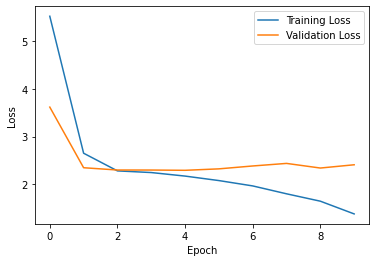

In [30]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


# Define input shape
input_shape = (30, 1662, 1)  # Assuming 30 frames with 1662 landmarks per frame, with 1 channel for grayscale images

# Define the model
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  # Convolutional layer with ReLU activation
    layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Another Convolutional layer with ReLU activation
    layers.MaxPooling2D(pool_size=(2, 2)),  # Another Max pooling layer
    layers.Flatten(),  # Flatten layer to convert 2D feature maps to 1D feature vectors
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (for 10 labels) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=12, validation_data=(X_test, y_test), verbose=1)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
model.save("C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\NFwlasl.keras")

In [25]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_train, y_train)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 0s 24ms/step - loss: 1.5721 - accuracy: 0.5750
Test Loss: 1.5720847845077515
Test Accuracy: 0.574999988079071


------------------------------------------------------------------------------

## with augmented data

In [3]:
import os
import cv2
import numpy as np
import mediapipe as mp

def extract_landmarks_with_labels(v_folder, output_folder):
    mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.4)
    
    # Initialize variables to store minimum values of each attribute
    min_pose_x, min_pose_y, min_pose_z, min_pose_visibility = np.inf, np.inf, np.inf, np.inf
    min_face_x, min_face_y, min_face_z = np.inf, np.inf, np.inf
    min_lh_x, min_lh_y, min_lh_z = np.inf, np.inf, np.inf
    min_rh_x, min_rh_y, min_rh_z = np.inf, np.inf, np.inf

    for action_folder in os.listdir(v_folder):
        action_path = os.path.join(v_folder, action_folder)
        output_action_path = os.path.join(output_folder, action_folder)
        print("Action folder:", action_folder)
        print(os.path.isdir(action_path))
        print(action_path)
        if os.path.isdir(action_path):
            print("Processing action folder:", action_folder)
            if not os.path.exists(output_action_path):
                os.makedirs(output_action_path)
            for video_folder in os.listdir(action_path):
                print("Video folder:", video_folder)
                video_path = os.path.join(action_path, video_folder)
                output_video_path = os.path.join(output_action_path, video_folder)
                if not os.path.exists(output_video_path):
                    os.makedirs(output_video_path)

                for frame_file in os.listdir(video_path):
                    if frame_file.endswith(".jpg"):
                        frame_path = os.path.join(video_path, frame_file)
                        frame_name = os.path.splitext(frame_file)[0]
                        output_frame_path = os.path.join(output_video_path, f"{frame_name}.npy")

                        frame = cv2.imread(frame_path)
                        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        results = mp_holistic.process(image)
                        
                        temp = []
                        
                        pose_landmarks = results.pose_landmarks
                        left_hand_landmarks = results.left_hand_landmarks
                        right_hand_landmarks = results.right_hand_landmarks
                        face_landmarks = results.face_landmarks
                        
                        # Update minimum values of pose landmarks
                        if pose_landmarks:
                            for res in pose_landmarks.landmark:
                                min_pose_x = min(min_pose_x, res.x)
                                min_pose_y = min(min_pose_y, res.y)
                                min_pose_z = min(min_pose_z, res.z)
                                min_pose_visibility = min(min_pose_visibility, res.visibility)
                                
                        
                        # Update minimum values of face landmarks
                        if face_landmarks:
                            for res in face_landmarks.landmark:
                                min_face_x = min(min_face_x, res.x)
                                min_face_y = min(min_face_y, res.y)
                                min_face_z = min(min_face_z, res.z)
                            
                        # Update minimum values of left hand landmarks
                        if left_hand_landmarks:
                            for res in left_hand_landmarks.landmark:
                                min_lh_x = min(min_lh_x, res.x)
                                min_lh_y = min(min_lh_y, res.y)
                                min_lh_z = min(min_lh_z, res.z)
                            
                        # Update minimum values of right hand landmarks
                        if right_hand_landmarks:
                            for res in right_hand_landmarks.landmark:
                                min_rh_x = min(min_rh_x, res.x)
                                min_rh_y = min(min_rh_y, res.y)
                                min_rh_z = min(min_rh_z, res.z)

    # Now we have the minimum values of each attribute, let's process the frames again to subtract these minimums
    for action_folder in os.listdir(v_folder):
        action_path = os.path.join(v_folder, action_folder)
        output_action_path = os.path.join(output_folder, action_folder)
        print("Action folder:", action_folder)
        if os.path.isdir(action_path):
            print("Processing action folder:", action_folder)
            for video_folder in os.listdir(action_path):
                print("Video folder:", video_folder)
                video_path = os.path.join(action_path, video_folder)
                output_video_path = os.path.join(output_action_path, video_folder)
                for frame_file in os.listdir(video_path):
#                     print("Frame:", frame_file)
                    if frame_file.endswith(".jpg"):
                        frame_path = os.path.join(video_path, frame_file)
                        frame_name = os.path.splitext(frame_file)[0]
                        output_frame_path = os.path.join(output_video_path, f"{frame_name}.npy")

                        frame = cv2.imread(frame_path)
                        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        results = mp_holistic.process(image)

                        temp = []
                        
                        pose_landmarks = results.pose_landmarks
                        left_hand_landmarks = results.left_hand_landmarks
                        right_hand_landmarks = results.right_hand_landmarks
                        face_landmarks = results.face_landmarks
                        
                        # Process pose landmarks
                        pose = np.zeros(33*4)
                        if pose_landmarks:
                            pose_x = [res.x for res in pose_landmarks.landmark]
                            pose_y = [res.y for res in pose_landmarks.landmark]
                            pose_z = [res.z for res in pose_landmarks.landmark]
                            pose_visibility = [res.visibility for res in pose_landmarks.landmark]
                            pose = np.array([[res.x - min_pose_x, res.y - min_pose_y, res.z - min_pose_z, res.visibility - min_pose_visibility] for res in pose_landmarks.landmark]).flatten()

                        # Process face landmarks
                        face = np.zeros(468*3)
                        if face_landmarks:
                            face_x = [res.x for res in face_landmarks.landmark]
                            face_y = [res.y for res in face_landmarks.landmark]
                            face_z = [res.z for res in face_landmarks.landmark]
                            face = np.array([[res.x - min_face_x, res.y - min_face_y, res.z - min_face_z] for res in face_landmarks.landmark]).flatten()
                            
                        # Process left hand landmarks
                        left_hand = np.zeros(21*3)
                        if left_hand_landmarks:
                            lh_x = [res.x for res in left_hand_landmarks.landmark]
                            lh_y = [res.y for res in left_hand_landmarks.landmark]
                            lh_z = [res.z for res in left_hand_landmarks.landmark]
                            left_hand = np.array([[res.x - min_lh_x, res.y - min_lh_y, res.z - min_lh_z] for res in left_hand_landmarks.landmark]).flatten()
                            
                        # Process right hand landmarks
                        right_hand = np.zeros(21*3)
                        if right_hand_landmarks:
                            rh_x = [res.x for res in right_hand_landmarks.landmark]
                            rh_y = [res.y for res in right_hand_landmarks.landmark]
                            rh_z = [res.z for res in right_hand_landmarks.landmark]
                            right_hand = np.array([[res.x - min_rh_x, res.y - min_rh_y, res.z - min_rh_z] for res in right_hand_landmarks.landmark]).flatten()
                        
                        # Combine all landmarks
                        combined_landmarks = np.concatenate([pose, face, left_hand, right_hand])
                        np.save(output_frame_path, combined_landmarks)
    mp_holistic.close()
    
data_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\newFrames"
output_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\landmarksNFaug"
extract_landmarks_with_labels(data_folder, output_folder)


Action folder: a
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\a
Processing action folder: a
Video folder: 01610
Video folder: 01611
Video folder: 01612
Video folder: 01615
Video folder: 66039
Action folder: a lot
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\a lot
Processing action folder: a lot
Video folder: 02124
Video folder: 02125
Video folder: 02126
Video folder: 02128
Video folder: 02129
Action folder: abdomen
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\abdomen
Processing action folder: abdomen
Video folder: 00335
Video folder: 00336
Video folder: 00338
Video folder: 00339
Video folder: 00341
Action folder: able
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\able
Processing action folder: able
Video folder: 00376
Video folder: 00377
Video folder: 00378
Video folder: 00381
Video folder: 00382
Action folder: about
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\about
Processing actio

In [4]:
data_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\newFrames"
output_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\landmarksNF"

In [5]:
actions = []
for action_folder in os.listdir(data_folder):
    actions.append(action_folder)

In [6]:
actions

['a',
 'a lot',
 'abdomen',
 'able',
 'about',
 'above',
 'accept',
 'accident',
 'accomplish',
 'across']

In [7]:
label_map = {label : num for num, label in enumerate(actions)}

In [8]:
label_map

{'a': 0,
 'a lot': 1,
 'abdomen': 2,
 'able': 3,
 'about': 4,
 'above': 5,
 'accept': 6,
 'accident': 7,
 'accomplish': 8,
 'across': 9}

In [9]:
seq, labels = [], []
for action in actions:
    for video_folder in os.listdir(os.path.join(data_folder, action)):
        sequence = []
        for frames in os.listdir(os.path.join(output_folder, action, video_folder)):
            res = np.load(os.path.join(output_folder, action, video_folder, frames))
            sequence.append(res)
        seq.append(sequence)
        labels.append(label_map[action])


In [10]:
x = np.array(seq)

In [11]:
y = np.array(labels)

In [1]:
x.shape

NameError: name 'x' is not defined

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 1660, 32)      320       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 14, 830, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 12, 828, 64)       18496     
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 6, 414, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_20 (Flatten)        (None, 158976)            0         
                                                                 
 dense_40 (Dense)            (None, 64)              

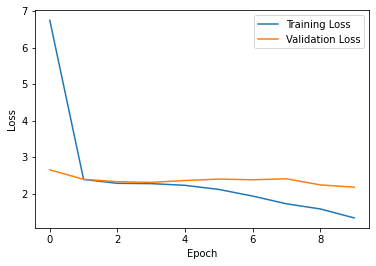

In [36]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


# Define input shape
input_shape = (30, 1662, 1)  # Assuming 30 frames with 1662 landmarks per frame, with 1 channel for grayscale images

# Define the model
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  # Convolutional layer with ReLU activation
    layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Another Convolutional layer with ReLU activation
    layers.MaxPooling2D(pool_size=(2, 2)),  # Another Max pooling layer
    layers.Flatten(),  # Flatten layer to convert 2D feature maps to 1D feature vectors
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 units (for 10 labels) and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    epochs=10,
    batch_size=10,
    validation_data=(X_test, y_test),  # Validation data
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

------

### applying normalization

In [2]:
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
# def extract_landmarks_with_labels(v_folder, output_folder):
#     mp_holistic = mp.solutions.holistic.Holistic(min_detection_confidence=0.3, min_tracking_confidence=0.4)
    
#     # Initialize variables to store minimum and maximum values of each attribute
#     min_pose_x, min_pose_y, min_pose_z, min_pose_visibility = np.inf, np.inf, np.inf, np.inf
#     min_face_x, min_face_y, min_face_z = np.inf, np.inf, np.inf
#     min_lh_x, min_lh_y, min_lh_z = np.inf, np.inf, np.inf
#     min_rh_x, min_rh_y, min_rh_z = np.inf, np.inf, np.inf
    
#     max_pose_x, max_pose_y, max_pose_z, max_pose_visibility = -np.inf, -np.inf, -np.inf, -np.inf
#     max_face_x, max_face_y, max_face_z = -np.inf, -np.inf, -np.inf
#     max_lh_x, max_lh_y, max_lh_z = -np.inf, -np.inf, -np.inf
#     max_rh_x, max_rh_y, max_rh_z = -np.inf, -np.inf, -np.inf

#     for action_folder in os.listdir(v_folder):
#         action_path = os.path.join(v_folder, action_folder)
#         output_action_path = os.path.join(output_folder, action_folder)
#         print("Action folder:", action_folder)
#         print(os.path.isdir(action_path))
#         print(action_path)
#         if os.path.isdir(action_path):
#             print("Processing action folder:", action_folder)
#             if not os.path.exists(output_action_path):
#                 os.makedirs(output_action_path)
#             for video_folder in os.listdir(action_path):
#                 print("Video folder:", video_folder)
#                 video_path = os.path.join(action_path, video_folder)
#                 output_video_path = os.path.join(output_action_path, video_folder)
#                 if not os.path.exists(output_video_path):
#                     os.makedirs(output_video_path)

#                 for frame_file in os.listdir(video_path):
#                     if frame_file.endswith(".jpg"):
#                         frame_path = os.path.join(video_path, frame_file)
#                         frame_name = os.path.splitext(frame_file)[0]
#                         output_frame_path = os.path.join(output_video_path, f"{frame_name}.npy")

#                         frame = cv2.imread(frame_path)
#                         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#                         results = mp_holistic.process(image)
                        
#                         temp = []
                        
#                         pose_landmarks = results.pose_landmarks
#                         left_hand_landmarks = results.left_hand_landmarks
#                         right_hand_landmarks = results.right_hand_landmarks
#                         face_landmarks = results.face_landmarks
                        
#                         # Update minimum values of pose landmarks
#                         if pose_landmarks:
#                             for res in pose_landmarks.landmark:
#                                 min_pose_x = min(min_pose_x, res.x)
#                                 min_pose_y = min(min_pose_y, res.y)
#                                 min_pose_z = min(min_pose_z, res.z)
#                                 min_pose_visibility = min(min_pose_visibility, res.visibility)
#                                 max_pose_x = max(max_pose_x, res.x)
#                                 max_pose_y = max(max_pose_y, res.y)
#                                 max_pose_z = max(max_pose_z, res.z)
#                                 max_pose_visibility = max(max_pose_visibility, res.visibility)
                                
                        
#                         # Update minimum values of face landmarks
#                         if face_landmarks:
#                             for res in face_landmarks.landmark:
#                                 min_face_x = min(min_face_x, res.x)
#                                 min_face_y = min(min_face_y, res.y)
#                                 min_face_z = min(min_face_z, res.z)
#                                 max_face_x = max(max_face_x, res.x)
#                                 max_face_y = max(max_face_y, res.y)
#                                 max_face_z = max(max_face_z, res.z)
                            
#                         # Update minimum values of left hand landmarks
#                         if left_hand_landmarks:
#                             for res in left_hand_landmarks.landmark:
#                                 min_lh_x = min(min_lh_x, res.x)
#                                 min_lh_y = min(min_lh_y, res.y)
#                                 min_lh_z = min(min_lh_z, res.z)
#                                 max_lh_x = max(max_lh_x, res.x)
#                                 max_lh_y = max(max_lh_y, res.y)
#                                 max_lh_z = max(max_lh_z, res.z)
                            
#                         # Update minimum values of right hand landmarks
#                         if right_hand_landmarks:
#                             for res in right_hand_landmarks.landmark:
#                                 min_rh_x = min(min_rh_x, res.x)
#                                 min_rh_y = min(min_rh_y, res.y)
#                                 min_rh_z = min(min_rh_z, res.z)
#                                 max_rh_x = max(max_rh_x, res.x)
#                                 max_rh_y = max(max_rh_y, res.y)
#                                 max_rh_z = max(max_rh_z, res.z)

#     # Now we have the minimum values of each attribute, let's process the frames again to subtract these minimums
#     for action_folder in os.listdir(v_folder):
#         action_path = os.path.join(v_folder, action_folder)
#         output_action_path = os.path.join(output_folder, action_folder)
#         print("Action folder:", action_folder)
#         if os.path.isdir(action_path):
#             print("Processing action folder:", action_folder)
#             for video_folder in os.listdir(action_path):
#                 print("Video folder:", video_folder)
#                 video_path = os.path.join(action_path, video_folder)
#                 output_video_path = os.path.join(output_action_path, video_folder)
#                 for frame_file in os.listdir(video_path):
# #                     print("Frame:", frame_file)
#                     if frame_file.endswith(".jpg"):
#                         frame_path = os.path.join(video_path, frame_file)
#                         frame_name = os.path.splitext(frame_file)[0]
#                         output_frame_path = os.path.join(output_video_path, f"{frame_name}.npy")

#                         frame = cv2.imread(frame_path)
#                         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#                         results = mp_holistic.process(image)

#                         temp = []
                        
#                         pose_landmarks = results.pose_landmarks
#                         left_hand_landmarks = results.left_hand_landmarks
#                         right_hand_landmarks = results.right_hand_landmarks
#                         face_landmarks = results.face_landmarks
                        
#                         # Process pose landmarks
#                         pose = np.zeros(33*4)
#                         if pose_landmarks:
#                             pose_x = [res.x for res in pose_landmarks.landmark]
#                             pose_y = [res.y for res in pose_landmarks.landmark]
#                             pose_z = [res.z for res in pose_landmarks.landmark]
#                             pose_visibility = [res.visibility for res in pose_landmarks.landmark]
#                             pose = np.array([[(res.x - min_pose_x)/(max_pose_x - min_pose_x),
#                                               (res.y - min_pose_y)/(max_pose_y - min_pose_y),
#                                               (res.z - min_pose_z)/(max_pose_z - min_pose_z),
#                                               (res.visibility - min_pose_visibility)/(max_pose_visibility - min_pose_visibility)] for res in pose_landmarks.landmark]).flatten()

#                         # Process face landmarks
#                         face = np.zeros(468*3)
#                         if face_landmarks:
#                             face_x = [res.x for res in face_landmarks.landmark]
#                             face_y = [res.y for res in face_landmarks.landmark]
#                             face_z = [res.z for res in face_landmarks.landmark]
#                             face = np.array([[(res.x - min_face_x)/(max_face_x - min_face_x),
#                                               (res.y - min_face_y)/(max_face_y - min_face_y),
#                                               (res.z - min_face_z)/(max_face_z - min_face_z)] for res in face_landmarks.landmark]).flatten()
                            
#                         # Process left hand landmarks
#                         left_hand = np.zeros(21*3)
#                         if left_hand_landmarks:
#                             lh_x = [res.x for res in left_hand_landmarks.landmark]
#                             lh_y = [res.y for res in left_hand_landmarks.landmark]
#                             lh_z = [res.z for res in left_hand_landmarks.landmark]
#                             left_hand = np.array([[(res.x - min_lh_x)/(max_lh_x - min_lh_x),
#                                                    (res.y - min_lh_y)/(max_lh_y - min_lh_y),
#                                                    (res.z - min_lh_z)/(max_lh_z - min_lh_z)] for res in left_hand_landmarks.landmark]).flatten()
                            
#                         # Process right hand landmarks
#                         right_hand = np.zeros(21*3)
#                         if right_hand_landmarks:
#                             rh_x = [res.x for res in right_hand_landmarks.landmark]
#                             rh_y = [res.y for res in right_hand_landmarks.landmark]
#                             rh_z = [res.z for res in right_hand_landmarks.landmark]
#                             right_hand = np.array([[(res.x - min_rh_x)/(max_rh_x - min_rh_x),
#                                                     (res.y - min_rh_y)/(max_rh_y - min_rh_y),
#                                                     (res.z - min_rh_z)/(max_rh_z - min_rh_z)] for res in right_hand_landmarks.landmark]).flatten()
                        
#                         # Combine all landmarks
#                         combined_landmarks = np.concatenate([pose, face, left_hand, right_hand])
#                         np.save(output_frame_path, combined_landmarks)
#     mp_holistic.close()
    
# data_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\newFrames"
# output_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\landmarksNFnorm"
# extract_landmarks_with_labels(data_folder, output_folder)


Action folder: a
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\a
Processing action folder: a
Video folder: 01610
Video folder: 01611
Video folder: 01612
Video folder: 01615
Video folder: 66039
Action folder: a lot
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\a lot
Processing action folder: a lot
Video folder: 02124
Video folder: 02125
Video folder: 02126
Video folder: 02128
Video folder: 02129
Action folder: abdomen
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\abdomen
Processing action folder: abdomen
Video folder: 00335
Video folder: 00336
Video folder: 00338
Video folder: 00339
Video folder: 00341
Action folder: able
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\able
Processing action folder: able
Video folder: 00376
Video folder: 00377
Video folder: 00378
Video folder: 00381
Video folder: 00382
Action folder: about
True
C:\Users\LENOVO\projects\Untitled Folder 3\dataset\newFrames\about
Processing actio

In [4]:
data_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\newFrames"
output_folder = "C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\landmarksNFnorm"

In [5]:
actions = []
for action_folder in os.listdir(data_folder):
    actions.append(action_folder)

In [6]:
actions = np.array(actions)

In [7]:
label_map = {label : num for num, label in enumerate(actions)}

In [8]:
label_map

{'a': 0,
 'a lot': 1,
 'abdomen': 2,
 'able': 3,
 'about': 4,
 'above': 5,
 'accept': 6,
 'accident': 7,
 'accomplish': 8,
 'across': 9}

In [9]:
seq, labels = [], []
for action in actions:
    for video_folder in os.listdir(os.path.join(data_folder, action)):
        sequence = []
        for frames in os.listdir(os.path.join(output_folder, action, video_folder)):
            res = np.load(os.path.join(output_folder, action, video_folder, frames))
            sequence.append(res)
        seq.append(sequence)
        labels.append(label_map[action])

In [10]:
from tensorflow.keras.utils import to_categorical
x = np.array(seq)
y = to_categorical(labels).astype(int)

In [11]:
y.shape

(50, 10)

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=47)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 1660, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 830, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 14, 830, 32)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 828, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 414, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 6, 414, 64)       

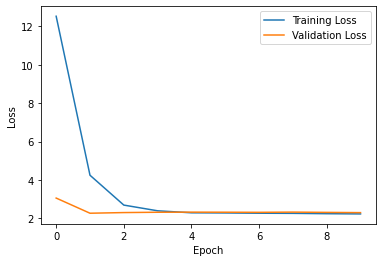

In [142]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

input_shape = (30, 1662, 1)  # 30 frames with 1662 landmarks per frame

model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.15),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.15), 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    epochs=10,
    batch_size=18,
    validation_data=(X_test, y_test),  # Validation data
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [143]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=20)
ypred = model.predict(X_test)

1/1 [==============================] - 0s 91ms/step


In [144]:
y_p = []
for i in ypred:
    temp = np.argmax(i)
    y_p.append(temp)
y_p

[0, 0, 0, 3, 0, 0, 3, 4, 0, 3, 5, 3, 3, 0, 3, 5, 0, 3, 0, 0]

In [145]:
y_r = []
for i in y_test:
    temp = np.argmax(i)
    y_r.append(temp)
y_r

[2, 2, 0, 1, 9, 0, 5, 4, 9, 4, 8, 3, 3, 0, 5, 6, 7, 8, 2, 0]

In [146]:
print(multilabel_confusion_matrix(y_r, y_p))

[[[10  6]
  [ 0  4]]

 [[19  0]
  [ 1  0]]

 [[17  0]
  [ 3  0]]

 [[13  5]
  [ 0  2]]

 [[18  0]
  [ 1  1]]

 [[16  2]
  [ 2  0]]

 [[19  0]
  [ 1  0]]

 [[19  0]
  [ 1  0]]

 [[18  0]
  [ 2  0]]

 [[18  0]
  [ 2  0]]]


In [147]:
print(accuracy_score(y_r, y_p))

0.35


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_r, y_p))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.29      1.00      0.44         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2

    accuracy                           0.35        20
   macro avg       0.17      0.25      0.17        20
weighted avg       0.21      0.35      0.23        20



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
model.save('wlasl_norm_CNN.keras')

-------

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=47)

In [242]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense, LeakyReLU

# model1 = Sequential()
# model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
# model1.add(Dropout(0.2)) 
# model1.add(LSTM(128, return_sequences=True, activation='relu'))
# model1.add(Dropout(0.2)) 
# model1.add(LSTM(64, return_sequences=False, activation='relu'))
# model1.add(Dense(64))
# model1.add(LeakyReLU(alpha=0.2))  # Leaky ReLU activation
# model1.add(Dense(32, activation='relu'))
# model1.add(Dense(actions.shape[0], activation='softmax'))

# from tensorflow.compat.v1.train import Optimizer
# model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30, 64)            442112    
                                                                 
 dropout_32 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_37 (LSTM)              (None, 30, 128)           98816     
                                                                 
 dropout_33 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_38 (LSTM)              (None, 64)                49408     
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 64)              

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, LeakyReLU

model1 = Sequential()
model1.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model1.add(Dropout(0.2)) 
model1.add(LSTM(128, return_sequences=True, activation='relu'))
model1.add(Dropout(0.2)) 
model1.add(LSTM(64, return_sequences=False, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(actions.shape[0], activation='softmax'))

from tensorflow.compat.v1.train import Optimizer
model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model1.summary()

In [243]:
history = model1.fit(X_train, y_train, epochs=50, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
23/23 [==============================] - 3s 39ms/step - loss: 111.2664 - categorical_accuracy: 0.1111 - val_loss: 140.7073 - val_categorical_accuracy: 0.0000e+00
Epoch 2/50
23/23 [==============================] - 1s 22ms/step - loss: 96.7176 - categorical_accuracy: 0.1111 - val_loss: 245.3902 - val_categorical_accuracy: 0.2000
Epoch 3/50
23/23 [==============================] - 1s 22ms/step - loss: 84.1561 - categorical_accuracy: 0.0889 - val_loss: 107.0206 - val_categorical_accuracy: 0.2000
Epoch 4/50
23/23 [==============================] - 1s 22ms/step - loss: 134.1332 - categorical_accuracy: 0.0889 - val_loss: 208.5452 - val_categorical_accuracy: 0.4000
Epoch 5/50
23/23 [==============================] - 1s 22ms/step - loss: 340.1337 - categorical_accuracy: 0.0889 - val_loss: 359.8377 - val_categorical_accuracy: 0.2000
Epoch 6/50
23/23 [==============================] - 1s 22ms/step - loss: 456.3426 - categorical_accuracy: 0.0444 - val_loss: 1645.5427 - val_categorical_

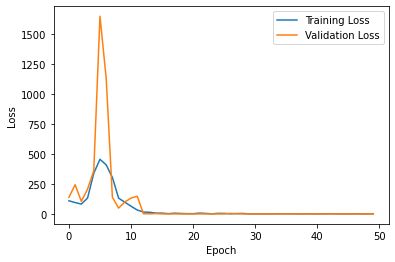

In [244]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [251]:
model1.save('wlasl_norm_LSTM.keras')

In [252]:
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
model1 = load_model('wlasl_norm_LSTM.keras')
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)
ypred = model1.predict(X_test)

1/1 [==============================] - 0s 299ms/step


In [253]:
y_p = []
for i in ypred:
    temp = np.argmax(i)
    y_p.append(temp)
y_p

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [254]:
y_r = []
for i in y_test:
    temp = np.argmax(i)
    y_r.append(temp)
y_r

[7, 4, 8, 8, 9, 4, 0, 6, 1, 1, 7, 0, 8, 6, 2, 4, 7, 5, 3, 6]

In [255]:
print(confusion_matrix(y_r, y_p))

[[0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


In [256]:
print(accuracy_score(y_r, y_p))

0.15


In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_r, y_p))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.15      1.00      0.26         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1

    accuracy                           0.15        20
   macro avg       0.01      0.10      0.03        20
weighted avg       0.02      0.15      0.04        20



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


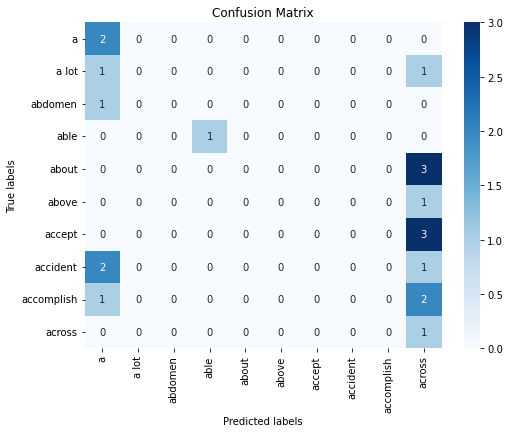

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_r, y_p)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


------

In [252]:
from tensorflow.keras.models import load_model
modelini = load_model('C:\\Users\\LENOVO\\projects\\Untitled Folder 3\\dataset\\NFwlasl.keras')

In [253]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
ypred = modelini.predict(X_test)

y_p = []
for i in ypred:
    temp = np.argmax(i)
    y_p.append(temp)
y_p


1/1 [==============================] - 0s 63ms/step


[8, 8, 8, 0, 0]

In [254]:
y_r = []
for i in y_test:
    temp = np.argmax(i)
    y_r.append(temp)
y_r

[8, 8, 6, 2, 7]

In [255]:
print(multilabel_confusion_matrix(y_r, y_p))

[[[3 2]
  [0 0]]

 [[4 0]
  [1 0]]

 [[4 0]
  [1 0]]

 [[4 0]
  [1 0]]

 [[2 1]
  [0 2]]]


In [256]:
print(accuracy_score(y_r, y_p))

0.4


In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_r, y_p))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.67      1.00      0.80         2

    accuracy                           0.40         5
   macro avg       0.13      0.20      0.16         5
weighted avg       0.27      0.40      0.32         5



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\